In this notebook I compare a custom python implementation of template matching with the OpenCV versions of the same algorithms.

- Cross Correlation Normalized
- Squared Difference
 

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

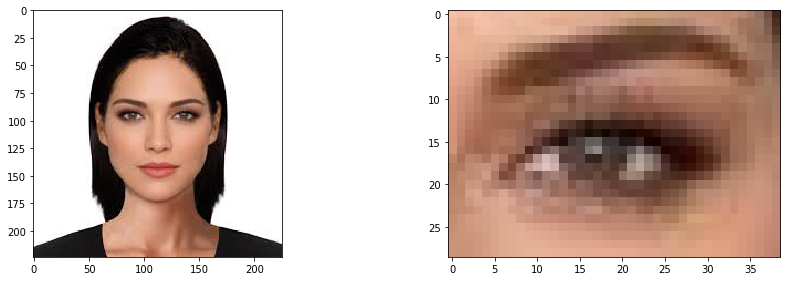

In [2]:
# full_image_path = 'Picture1.png'
# template_path = 'Picture2.png'

full_image_path = 'face1.jpg'
template_path = 'face2.jpg'

if full_image_path == 'Picture1.png':
    box_for_iou = ((278, 136), (453, 320))
elif full_image_path == 'face1.jpg':
    box_for_iou = ((119, 79), (158, 107))

def calculate_iou(a, b):    
    xa, ya = max(a[0][0], b[0][0]), max(a[0][1], b[0][1])
    xb, yb = min(a[1][0], b[1][0]), min(a[1][1], b[1][1])     
    ia = (xb - xa + 1) * (yb - ya + 1)    
    aa = (a[1][0] - a[0][0] + 1) * (a[1][1] - a[0][1] + 1)
    ba = (b[1][0] - b[0][0] + 1) * (b[1][1] - b[0][1] + 1)
    return ia / float(aa + ba - ia)         

full_image = cv2.imread(full_image_path)
full_image = cv2.cvtColor(full_image, cv2.COLOR_BGR2RGB)
image_template = cv2.imread(template_path)
image_template = cv2.cvtColor(image_template, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.imshow(full_image, plt.cm.gray)
plt.subplot(2, 2, 2)
plt.imshow(image_template, plt.cm.gray)

# Cross Correlation Normalized

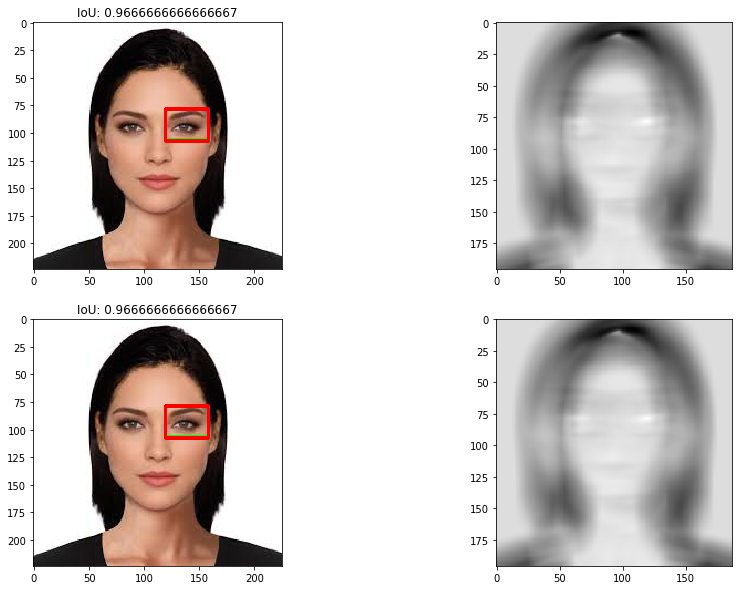

In [3]:
# OpenCV version first
res = cv2.matchTemplate(full_image, image_template, cv2.TM_CCORR_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
h, w = image_template.shape[0:2]
bottom_right = (max_loc[0] + w, max_loc[1] + h)
matched_im = cv2.rectangle(full_image.copy(), box_for_iou[0], box_for_iou[1], (0, 255, 0), 2)
matched_im = cv2.rectangle(matched_im, max_loc, bottom_right, (255, 0, 0), 2)
iou1 = calculate_iou(box_for_iou, (max_loc, bottom_right))

# Next we will show my own implementation
fheight, fwidth = full_image.shape[0:2]
theight, twidth = image_template.shape[0:2]

result = []
T = image_template.astype(float)
for y in range(fheight):
    for x in range(fwidth):
        if x + twidth < fwidth + 1 and y + theight < fheight + 1:
            # calculate correlation first
            I = full_image[y:y + theight, x:x + twidth, :].astype(float)
            corr = (T * I).sum()
            # now create the denominator
            sumsqT = (T ** 2).sum()
            sumsqI = (I ** 2).sum()
            denominator = np.sqrt(sumsqT * sumsqI)
            # divide 
            correlation = corr / denominator
            correlation = np.nan_to_num(correlation)
            if len(result) - 1 < y:
                result.append([])
            result[y].append(correlation)
result = np.array(result)
min_val2, max_val2, min_loc2, max_loc2 = cv2.minMaxLoc(result)
h2, w2 = image_template.shape[0:2]
bottom_right2 = (max_loc2[0] + w2, max_loc2[1] + h2)
matched_im2 = cv2.rectangle(full_image.copy(), box_for_iou[0], box_for_iou[1], (0, 255, 0), 2)
matched_im2 = cv2.rectangle(matched_im2, max_loc2, bottom_right2, (255, 0, 0), 2)
iou2 = calculate_iou(box_for_iou, [max_loc2, bottom_right2])

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
# my image with red rectangle
plt.title('IoU: ' + str(iou2))
plt.imshow(matched_im2, plt.cm.gray)
plt.subplot(2, 2, 2)
# my correlation response
plt.imshow(result, plt.cm.gray)
plt.subplot(2, 2, 3)
# opencv image with red rectangle
plt.title('IoU: ' + str(iou1))
plt.imshow(matched_im, plt.cm.gray)
plt.subplot(2, 2, 4)
# opencv correlation response
plt.imshow(res, plt.cm.gray)

# Squared Difference

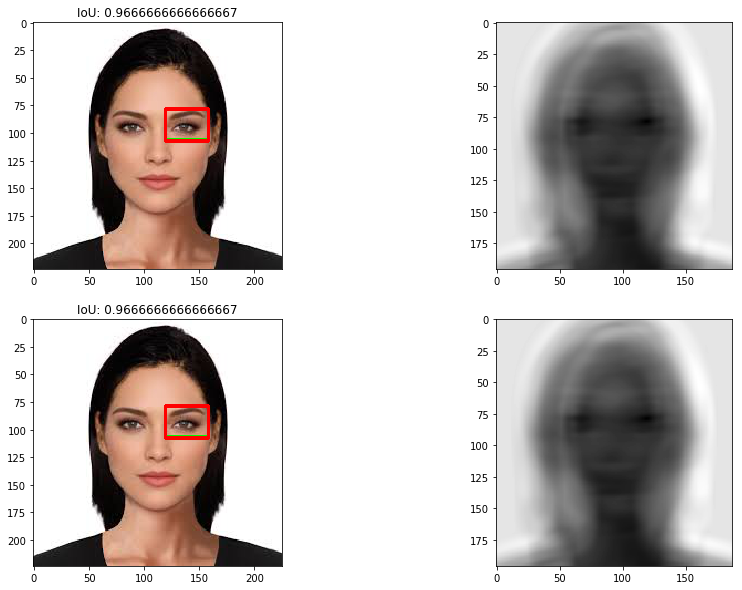

In [4]:
# OpenCV First
res = cv2.matchTemplate(full_image, image_template, cv2.TM_SQDIFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
h, w = image_template.shape[0:2]
bottom_right = (min_loc[0] + w, min_loc[1] + h)
matched_im = cv2.rectangle(full_image.copy(), box_for_iou[0], box_for_iou[1], (0, 255, 0), 2)
matched_im = cv2.rectangle(matched_im, min_loc, bottom_right, (255, 0, 0), 2)
iou1 = calculate_iou(box_for_iou, (min_loc, bottom_right))

# My implementation
fheight, fwidth = full_image.shape[0:2]
theight, twidth = image_template.shape[0:2]

result = []
T = image_template.astype(float)
for y in range(fheight):
    for x in range(fwidth):
        if x + twidth < fwidth + 1 and y + theight < fheight + 1:
            I = full_image[y:y + theight, x:x + twidth, :]
            # subtract and square
            m = (T - I) ** 2
            correlation = m.sum()
            if len(result) - 1 < y:
                result.append([])
            result[y].append(correlation)
result = np.array(result)

min_val2, max_val2, min_loc2, max_loc2 = cv2.minMaxLoc(result)
h2, w2 = image_template.shape[0:2]

bottom_right2 = (min_loc2[0] + w2, min_loc2[1] + h2)
matched_im2 = cv2.rectangle(full_image.copy(), box_for_iou[0], box_for_iou[1], (0, 255, 0), 2)
matched_im2 = cv2.rectangle(matched_im2, min_loc2, bottom_right2, (255, 0, 0), 2)
iou2 = calculate_iou(box_for_iou, [min_loc2, bottom_right2])

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
# my image with red rectangle
plt.title('IoU: ' + str(iou2))
plt.imshow(matched_im2, plt.cm.gray)
plt.subplot(2, 2, 2)
# my correlation response
plt.imshow(result, plt.cm.gray)
plt.subplot(2, 2, 3)
# opencv image with red rectangle
plt.title('IoU: ' + str(iou1))
plt.imshow(matched_im, plt.cm.gray)
plt.subplot(2, 2, 4)
# opencv correlation response
plt.imshow(res, plt.cm.gray)

# Correlation Coefficient

In this example I used a vectorized version of the following equation for Correlation Coeffiecient 
$$ r = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2(y_i - \overline{y})^2}} $$

I am not sure what kind of equation was used for the OpenCV correltation coefficient (TM_CCOEFF) but I did observe better results using the equation above when compared to the OpenCV version.

In my test using the Face image I noticed that the OpenCV version correlation response highlighted the hair in the lower left while my equation was right on target.

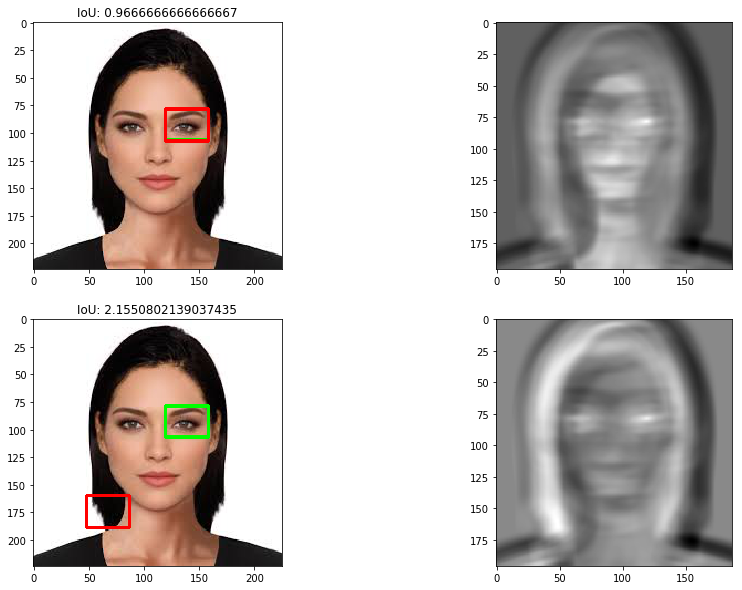

In [5]:
# OpenCV First
res = cv2.matchTemplate(full_image, image_template, cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
h, w = image_template.shape[0:2]
bottom_right = (max_loc[0] + w, max_loc[1] + h)
matched_im = cv2.rectangle(full_image.copy(), box_for_iou[0], box_for_iou[1], (0, 255, 0), 2)
matched_im = cv2.rectangle(matched_im, max_loc, bottom_right, (255, 0, 0), 2)
iou1 = calculate_iou(box_for_iou, (max_loc, bottom_right))

# And my own implementation using the equation above
fheight, fwidth = full_image.shape[0:2]
theight, twidth = image_template.shape[0:2]
template_mean = image_template.mean()
image_mean = full_image.mean()

result = []
T = image_template.astype(float)
tdiff = T - template_mean
for y in range(fheight):
    for x in range(fwidth):
        if x + twidth < fwidth + 1 and y + theight < fheight + 1:
            I = full_image[y:y + theight, x:x + twidth, :].astype(float)
            idiff = I - image_mean
            
            numerator = (tdiff * idiff).sum()
            denominator = np.sqrt(np.sum(tdiff ** 2) * np.sum(idiff ** 2))

            correlation = numerator / denominator
            if len(result) - 1 < y:
                result.append([])
            result[y].append(correlation)
result = np.array(result)
min_val2, max_val2, min_loc2, max_loc2 = cv2.minMaxLoc(result)
h2, w2 = image_template.shape[0:2]
bottom_right2 = (max_loc2[0] + w2, max_loc2[1] + h2)
matched_im2 = cv2.rectangle(full_image.copy(), box_for_iou[0], box_for_iou[1], (0, 255, 0), 2)
matched_im2 = cv2.rectangle(matched_im2, max_loc2, bottom_right2, (255, 0, 0), 2)
iou2 = calculate_iou(box_for_iou, [max_loc2, bottom_right2])


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
# my image with red rectangle
plt.title('IoU: ' + str(iou2))
plt.imshow(matched_im2, plt.cm.gray)
plt.subplot(2, 2, 2)
# my correlation response
plt.imshow(result, plt.cm.gray)
plt.subplot(2, 2, 3)
# opencv image with red rectangle
plt.title('IoU: ' + str(iou1))
plt.imshow(matched_im, plt.cm.gray)
plt.subplot(2, 2, 4)
# opencv correlation response
plt.imshow(res, plt.cm.gray)